# Tutorial Notebook

This notebook is best used if copied into a new directory, with all files in the same directory.

## Imports and Baseline Checks

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import re
import be_scan
# can also import like: 
#    from be_scan.analysis import count_reads, merge_and_norm, average_reps
#    from be_scan.plot import plot_scatterplot


In [2]:
# checking which modules are available for which function etc
print(dir(be_scan))
print(dir(be_scan.sgrna))
print(dir(be_scan.analysis))
print(dir(be_scan.plot))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'analysis', 'plot', 'sgrna']
['DNA_to_AA', '_BE_guides_', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_aminoacid_', '_genomic_', '_guides_', 'annotate_BE_guides', 'complement', 'identify_BE_guides', 'make_mutations', 'process_PAM', 'protein_to_AAseq', 'rev_complement']
['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_sanger', 'average_reps', 'batch_process', 'compare_conds', 'count_reads', 'merge_and_norm', 'validate_cloning']
['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_annotating_', 'boxes', 'correlation_heatmap', 'correlation_scatter', 'plot_boxes', 'plot_corr_heatmap', 'plot_corr_scatterplot', 'plot_scatterplot', 'scatterplot']


In [3]:
test_dir = '../../../tests/test_data/plot_data/'
HDAC_parent_dir = '../../../../../../Downloads/HDAC_Data/'
CRAF_parent_dir = '../../../../../../Downloads/CRAF_Data/'
KBTBD4_parent_dir = '../../../../../../Downloads/KBTBD4/'

Note: all annotate_guides.csv needs information about type of mutation (Missense, Silent, Nonsense, No_A/Exon, Control) and where the edit is along the gene (integer)

In [4]:
# rennotate Megan's HDAC data
df = pd.read_csv(HDAC_parent_dir + 'annotated_HDAC1_ABE.csv')
df['Mut_type'] = np.where(df['Mutation category.x'].str.contains('Missense'), 'Missense', 
                 np.where(df['Mutation category.x'].str.contains('Silent'), 'Silent', 
                 np.where(df['Mutation category.x'].isnull(), 'No_A/Exon', 
                 'Control')))
df['Edit_site'] = np.where(df['Amino_acid_edit'].isnull(), -1, df['Amino_acid_edit'])
df.to_csv(HDAC_parent_dir + 'XYH_annotated_HDAC1_ABE.csv')


regex_edit = r'(\d+)(\w+)'

# rennotate Megan's KBTBD4 data
df = pd.read_csv(KBTBD4_parent_dir + 'sgRNA_KBTBD4_ABE.csv') # Missense, silent, control
df['Mut_type'] = np.where((df['ABE_Mutation_category'].str.contains('Missense')) & (df['# edits']>0), 'Missense', 
                 np.where((df['ABE_Mutation_category'].str.contains('Silent')) & (df['#silent edits']>0), 'Silent', 
                 np.where((df['# edits']==0) & (df['#silent edits']==0), 'No_A/Exon', 
                 'Control')))
df['Edit_site'] = np.where(df['Mut_type'].str.contains('Missense', regex= True) | df['Mut_type'].str.contains('Silent', regex= True), df['ABE_edit'].str.extract(regex_edit)[0], -1)
df.to_csv(KBTBD4_parent_dir + 'XYH_annotated_KBTBD4_ABE.csv')

# rennotate Megan's KBTBD4 data
df = pd.read_csv(KBTBD4_parent_dir + 'sgRNA_KBTBD4_CBE.csv') # Missense, silent, control
df['Mut_type'] = np.where((df['CBE_Mutation_category'].str.contains('Missense')) & (df['# edits']>0), 'Missense', 
                 np.where((df['CBE_Mutation_category'].str.contains('Nonsense')) & (df['# edits']>0), 'Nonsense', 
                 np.where((df['CBE_Mutation_category'].str.contains('Silent')) & (df['#silent edits']>0), 'Silent', 
                 np.where((df['# edits']==0) & (df['#silent edits']==0), 'No_C/Exon', 
                 'Control'))))
df['Edit_site'] = np.where(df['Mut_type'].str.contains('Missense', regex= True) | df['Mut_type'].str.contains('Silent', regex= True) | df['Mut_type'].str.contains('Nonsense', regex= True), df['CBE_edit'].str.extract(regex_edit)[0], -1)
df.to_csv(KBTBD4_parent_dir + 'XYH_annotated_KBTBD4_CBE.csv')

# if contains missense then missense, elif contains silent then silent, NaN is No_AC/Exon, else UTR Intron splice-donor splice-acceptor control

## Unit Testing Function Calls

### be_scan.sgrna

### be_scan.analysis

### be_scan.plot

Starting from Nick's DNMT3A data in the .csv format and regenerating the scatterplot, boxplot, correlation heatmap, and correlation scatterplot. 

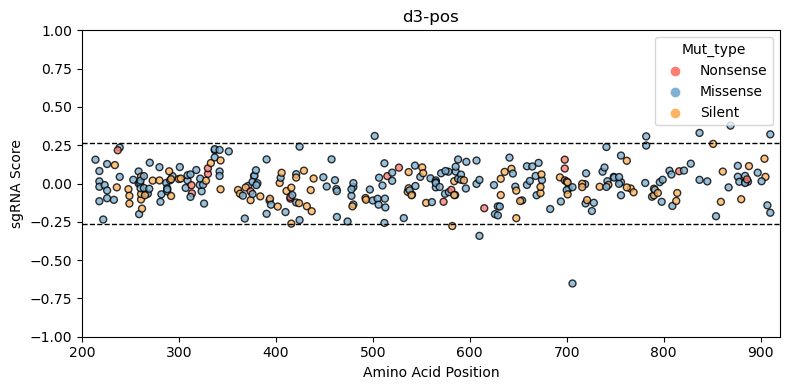

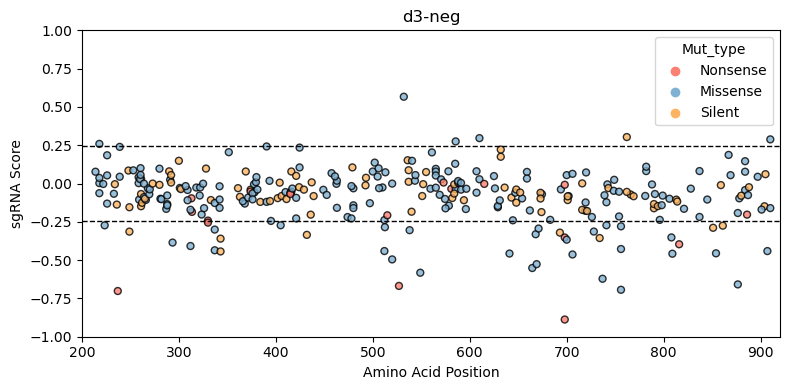

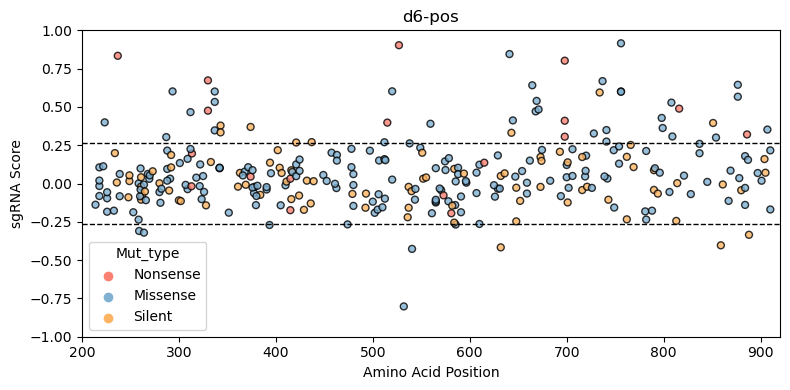

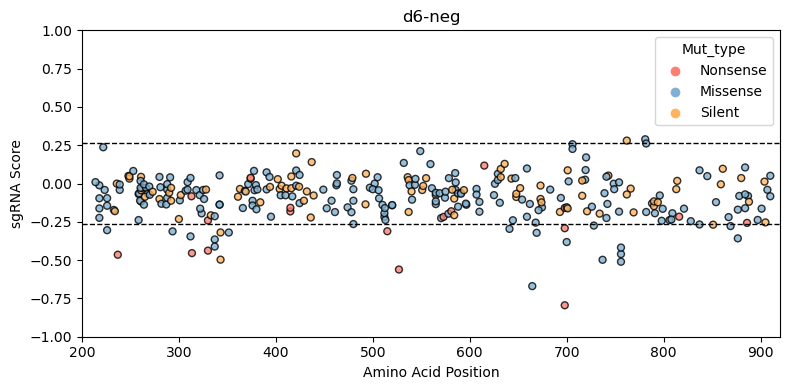

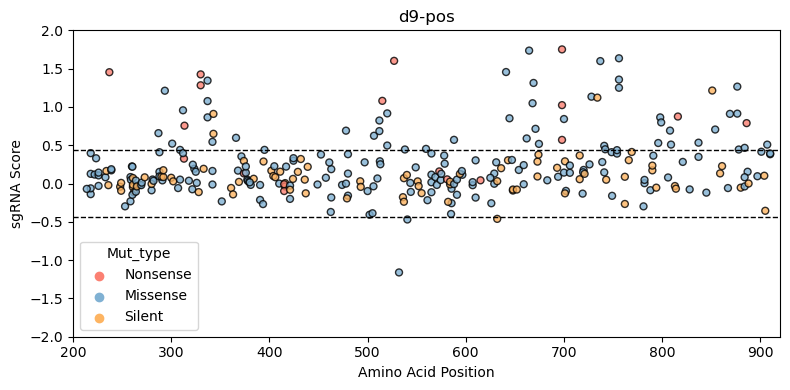

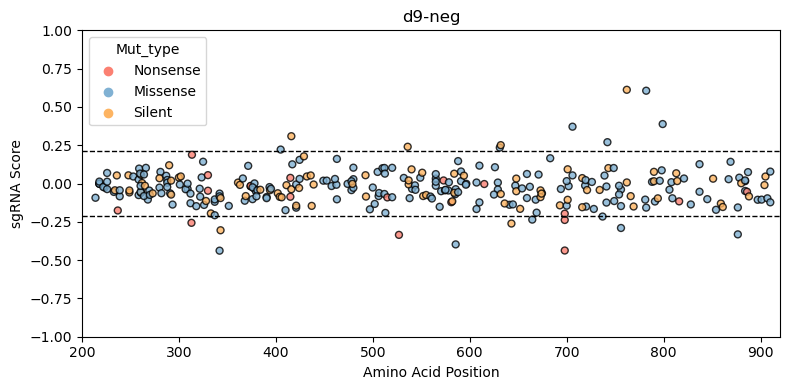

In [5]:
be_scan.plot.plot_scatterplot(df_filepath       = test_dir + 'NZL10196_v9_comparisons.csv', 
                              x_column          = 'Edit_site_3A1', 
                              y_column          = 'log2_fc', 
                              hue_column        = 'Mut_type', 
                              comparisons       = ['d3-pos', 'd3-neg', 'd6-pos', 'd6-neg', 'd9-pos', 'd9-neg'], 
                              neg_ctrl_col      = 'Gene', 
                              neg_ctrl_category = 'NON-GENE',
                              xmin              = 200, 
                              savefig           = False,
                              )

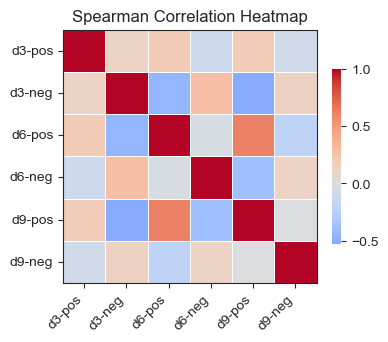

In [6]:
be_scan.plot.plot_corr_heatmap(df_filepath       = test_dir + 'NZL10196_v9_comparisons.csv', 
                               comparisons       = ['d3-pos', 'd3-neg', 'd6-pos', 'd6-neg', 'd9-pos', 'd9-neg'], 
                               savefig           = False,
                               )

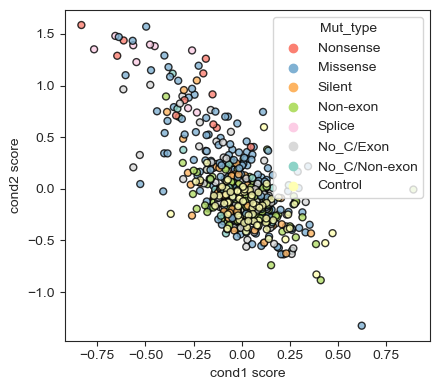

In [7]:
be_scan.plot.plot_corr_scatterplot(df_filepath = test_dir + 'NZL10196_v9_comparisons.csv', 
                                   condition1  = 'd3-neg', 
                                   condition2  = 'd9-pos', 
                                   hue_column  = 'Mut_type',
                                   savefig     = False,
                                   )

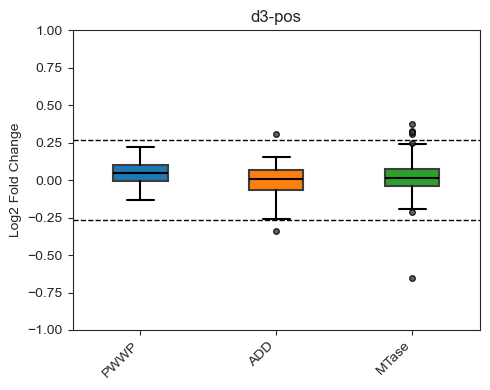

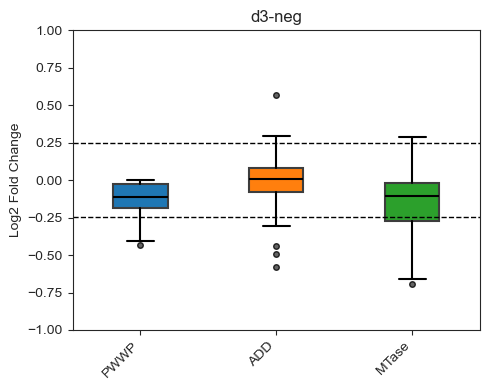

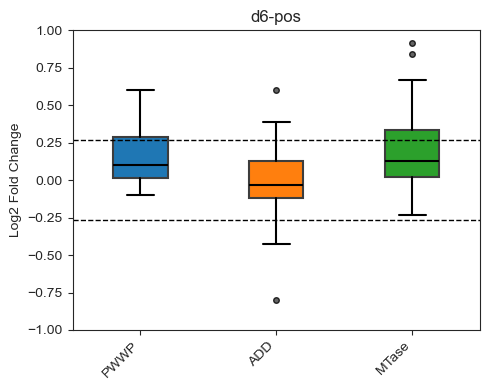

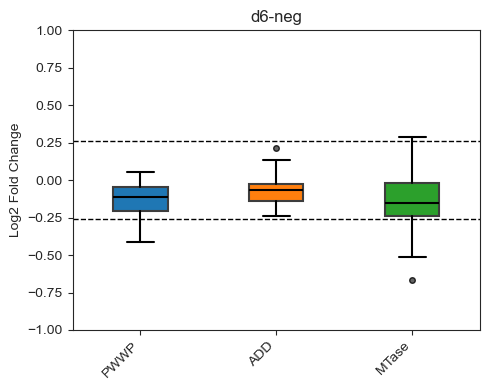

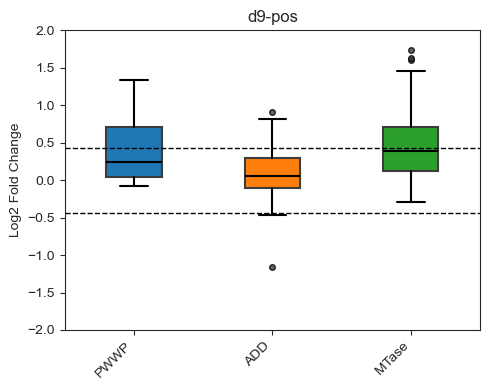

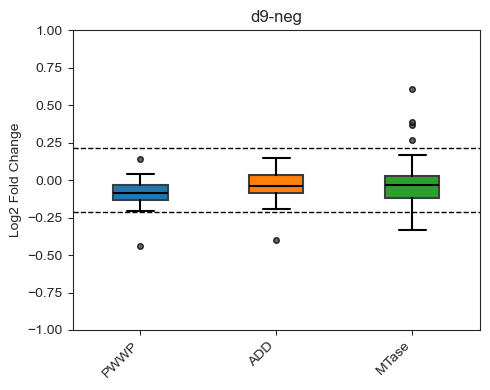

In [8]:
be_scan.plot.plot_boxes(df_filepath       = test_dir + 'NZL10196_v9_comparisons.csv', 
                        plot_column       = 'Domain', 
                        plot_conditions   = ['PWWP', 'ADD', 'MTase'], 
                        y_column          = 'log2_fc', 
                        comparisons       = ['d3-pos', 'd3-neg', 'd6-pos', 'd6-neg', 'd9-pos', 'd9-neg'], 
                        neg_ctrl_col      = 'Gene', 
                        neg_ctrl_category = 'NON-GENE',
                        savefig           = False,
)

## Unit Testing CLI

### be_scan.sgrna 

### be_scan.analysis

### be_scan.plot

In [9]:
# plot_scatterplot
! python3 -m be_scan plot_scatterplot -df '../../../tests/test_data/plot_data/NZL10196_v9_comparisons.csv' -x 'Edit_site_3A1' -y 'log2_fc' -hue 'Mut_type' -ncol 'Gene' -ncat 'NON-GENE' --xmin 200  --savefig False -c 'd3-pos' 'd3-neg' 'd6-pos' 'd6-neg' 'd9-pos' 'd9-neg'
### for some reason this still saves figures

# plot_corr_heatmap
! python3 -m be_scan plot_corr_heatmap -df '../../../tests/test_data/plot_data/NZL10196_v9_comparisons.csv' -c 'd3-pos' 'd3-neg' 'd6-pos' 'd6-neg' 'd9-pos' 'd9-neg' --savefig False

# plot_corr_scatterplot
! python3 -m be_scan plot_corr_scatterplot -df '../../../tests/test_data/plot_data/NZL10196_v9_comparisons.csv' -c1 'd3-neg' -c2 'd9-pos' -hue 'Mut_type' --hue_order 'Nonsense' 'Missense' 'Silent' 'Non-exon' 'Splice' 'No_C/Exon' 'No_C/Non-exon' 'Control' --savefig False
### for some reason list_muttypes is not importing so input manually

# plot_boxes
! python3 -m be_scan plot_boxes -df '../../../tests/test_data/plot_data/NZL10196_v9_comparisons.csv' -p 'Domain' -pc 'PWWP' 'ADD' 'MTase' -y 'log2_fc' -c 'd3-pos' 'd3-neg' 'd6-pos' 'd6-neg' 'd9-pos' 'd9-neg' -ncol 'Gene' -ncat "NON-GENE" --savefig False


Figure(800x400)
Figure(800x400)
Figure(800x400)
Figure(800x400)
Figure(800x400)
Figure(800x400)
Figure(400x400)
/Users/calvinxyh/Documents/GitHub/be_scan/be_scan/plot/correlation_scatter.py:89: UserWarning: The palette list has more values (10) than needed (8), which may not be intended.
  sns.scatterplot(data=df_filtered,
Figure(450x400)
Figure(500x400)
Figure(500x400)
Figure(500x400)
Figure(500x400)
Figure(500x400)
Figure(500x400)


ran <code>python3 -m be_scan plot_scatterplot -df 'tests/test_data/plot_data/NZL10196_v9_comparisons.csv' -x 'Edit_site_3A1' -y 'log2_fc' -hue 'Mut_type' -ncol 'Gene' -ncat 'NON-GENE' --xmin 200  --savefig False -c 'd3-pos' 'd3-neg' 'd6-pos' 'd6-neg' 'd9-pos' 'd9-neg'</code> from terminal <code>be_scan/</code>

ran <code>python3 -m be_scan plot_corr_heatmap -df 'tests/test_data/plot_data/NZL10196_v9_comparisons.csv' -c 'd3-pos' 'd3-neg' 'd6-pos' 'd6-neg' 'd9-pos' 'd9-neg' --savefig False</code> from terminal <code>be_scan/</code>

ran <code>python3 -m be_scan plot_corr_scatterplot -df 'tests/test_data/plot_data/NZL10196_v9_comparisons.csv' -c1 'd3-neg' -c2 'd9-pos' -hue 'Mut_type' --hue_order 'Nonsense' 'Missense' 'Silent' 'Non-exon' 'Splice' 'No_C/Exon' 'No_C/Non-exon' 'Control' --savefig False</code> from terminal <code>be_scan/</code>

ran <code>python3 -m be_scan plot_boxes -df 'tests/test_data/plot_data/NZL10196_v9_comparisons.csv' -p 'Domain' -pc 'PWWP' 'ADD' 'MTase' -y 'log2_fc' -c 'd3-pos' 'd3-neg' 'd6-pos' 'd6-neg' 'd9-pos' 'd9-neg' -ncol 'Gene' -ncat "NON-GENE" --savefig False</code> from terminal <code>be_scan/</code>

## Integration Testing Function Calls

### HDAC Data (MY)

Now trying the analysis and plotting workflow with Megan's HDAC Data

In [5]:
# declaring variables to make commands shorter
in_ref = HDAC_parent_dir + "XYH_annotated_HDAC1_ABE.csv"
HDAC_sample_sheet = HDAC_parent_dir + '231128_HDAC1_batch.csv'
in_lfc = HDAC_parent_dir + "agg_t0_reps.csv"
in_agg = HDAC_parent_dir + "agg_t0_conds.csv"
in_comparisons = HDAC_parent_dir + "comparisons.csv"
keyrev = 'GTTTGAGA'


In [10]:
# option 1
be_scan.analysis.count_reads(
    HDAC_sample_sheet,
    in_ref,
    KEY_REV  = 'GTTTGAGA', 
    file_dir = HDAC_parent_dir
)
be_scan.analysis.merge_and_norm(
    HDAC_sample_sheet,
    in_ref,
    file_dir = HDAC_parent_dir
)
be_scan.analysis.average_reps(
    HDAC_sample_sheet,
    in_lfc,
    file_dir = HDAC_parent_dir
)
be_scan.analysis.compare_conds(
    in_comparisons,
    in_agg,
    file_dir = HDAC_parent_dir
)

# option 2
# be_scan.analysis.batch_process(
#     HDAC_sample_sheet,
#     in_ref,
#     in_comparisons,
#     file_dir = HDAC_parent_dir,
#     KEY_REV  = 'GTTTGAGA', 
# )

../../../../../../Downloads/HDAC_Data/MY381-1_S30_L001_R1_001.fastq processed
../../../../../../Downloads/HDAC_Data/MY381-5_S34_L001_R1_001.fastq processed
../../../../../../Downloads/HDAC_Data/MY381-6_S35_L001_R1_001.fastq processed
../../../../../../Downloads/HDAC_Data/MY381-7_S36_L001_R1_001.fastq processed
../../../../../../Downloads/HDAC_Data/MY381-8_S37_L001_R1_001.fastq processed
../../../../../../Downloads/HDAC_Data/MY381-9_S38_L001_R1_001.fastq processed
../../../../../../Downloads/HDAC_Data/MY381-10_S39_L001_R1_001.fastq processed
Merge and normalize completed
Average reps completed
Compare conditions completed


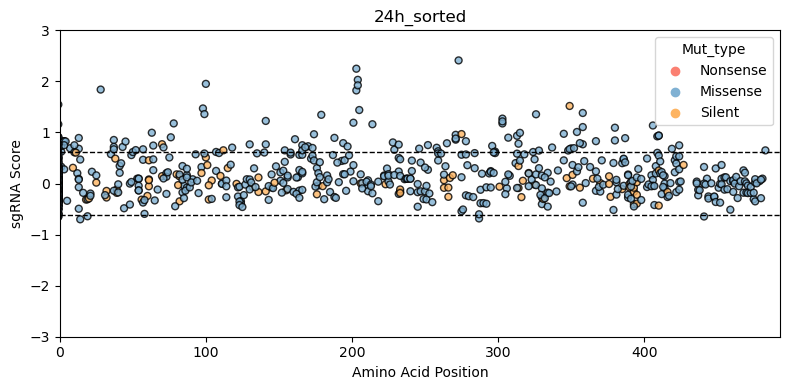

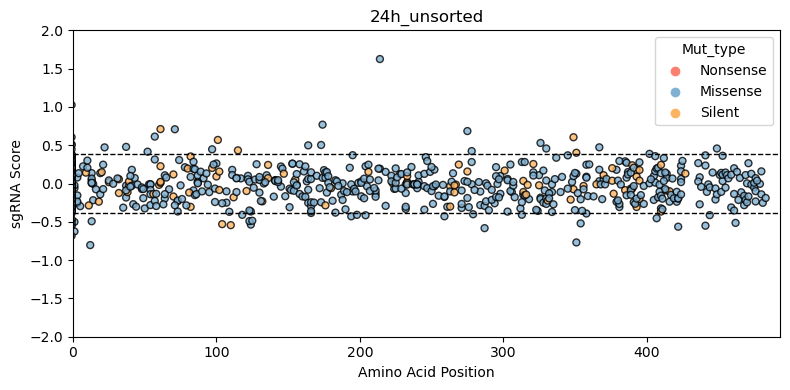

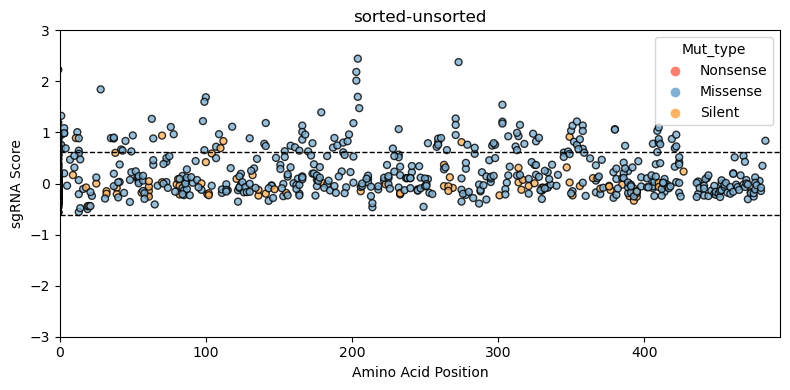

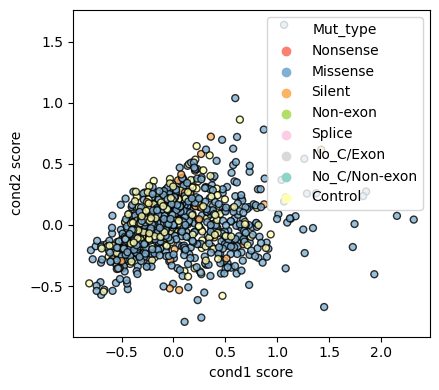

In [11]:
be_scan.plot.plot_scatterplot(df_filepath       = HDAC_parent_dir + 'agg_comps.csv', 
                              x_column          = 'Edit_site', 
                              y_column          = 'log2_fc', 
                              hue_column        = 'Mut_type', 
                              comparisons       = ['24h_sorted', '24h_unsorted', 'sorted-unsorted'], 
                              neg_ctrl_col      = 'Mut_type', 
                              neg_ctrl_category = 'Control',
                              xmin              = 0
                              )

be_scan.plot.plot_corr_scatterplot(df_filepath  = HDAC_parent_dir + 'agg_comps.csv', 
                                   condition1   = '24h_sorted', 
                                   condition2   = '24h_unsorted', 
                                   hue_column   = 'Mut_type',
                                   savefig      = False,
                                   )

### CRAF Data (JW)

In [12]:
# declaring variables to make commands shorter
in_ref = CRAF_parent_dir + 'CRAF_and_cntrls_ref_lib.csv'
CRAF_sample_sheet = CRAF_parent_dir + 'sample_sheet_batch_count_CBE.csv'
in_lfc = CRAF_parent_dir + "agg_t0_reps.csv"
in_agg = CRAF_parent_dir + "agg_t0_conds.csv"
keyrev = 'GTTTGAGA'
in_comparisons = CRAF_parent_dir + "comparisons.csv"

In [19]:
# option 1
be_scan.analysis.count_reads(
    CRAF_sample_sheet,
    in_ref,
    KEY_REV  = 'GTTTGAGA', 
    file_dir = CRAF_parent_dir
)
be_scan.analysis.merge_and_norm(
    CRAF_sample_sheet,
    in_ref,
    file_dir = CRAF_parent_dir
)
be_scan.analysis.average_reps(
    CRAF_sample_sheet,
    in_lfc,
    file_dir = CRAF_parent_dir
)
be_scan.analysis.compare_conds(
    in_comparisons,
    in_agg,
    file_dir = CRAF_parent_dir
)

# option 2
# be_scan.analysis.batch_process(
#     CRAF_sample_sheet,
#     in_ref,
#     in_comparisons,
#     file_dir = CRAF_parent_dir,
#     KEY_REV  = 'GTTTGAGA', 
# )

../../../../../../Downloads/CRAF_Data/JW114-01_S1_L001_R1_001.fastq processed
../../../../../../Downloads/CRAF_Data/JW114-02_S2_L001_R1_001.fastq processed
../../../../../../Downloads/CRAF_Data/JW114-03_S3_L001_R1_001.fastq processed
../../../../../../Downloads/CRAF_Data/JW114-04_S4_L001_R1_001.fastq processed
../../../../../../Downloads/CRAF_Data/JW114-05_S5_L001_R1_001.fastq processed
../../../../../../Downloads/CRAF_Data/JW114-06_S6_L001_R1_001.fastq processed
../../../../../../Downloads/CRAF_Data/JW114-07_S7_L001_R1_001.fastq processed
Merge and normalize completed
Average reps completed
Compare conditions completed


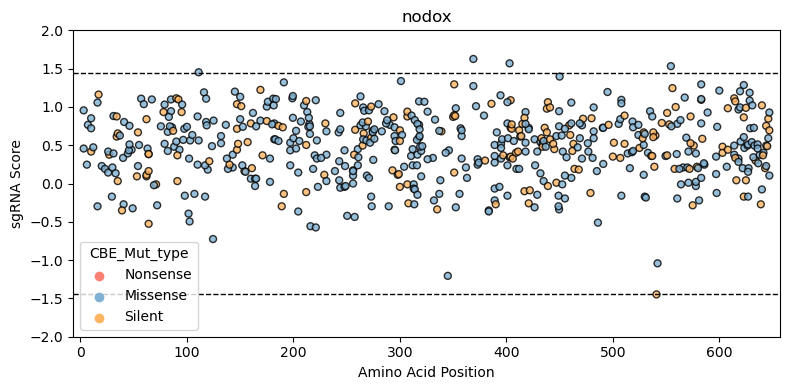

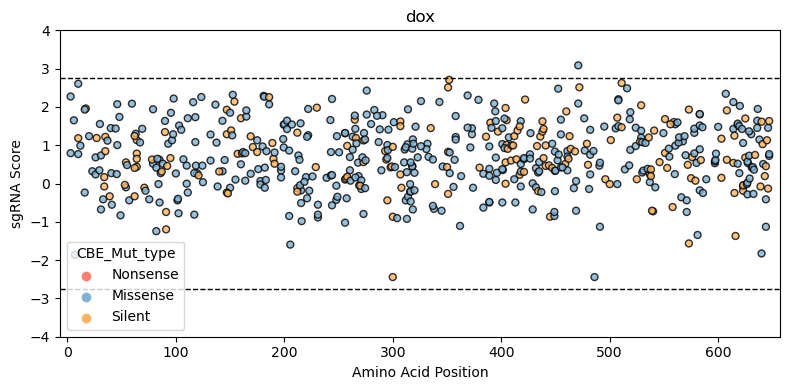

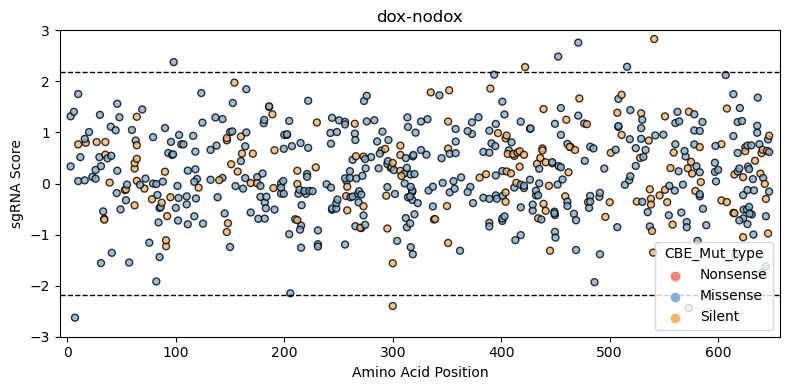

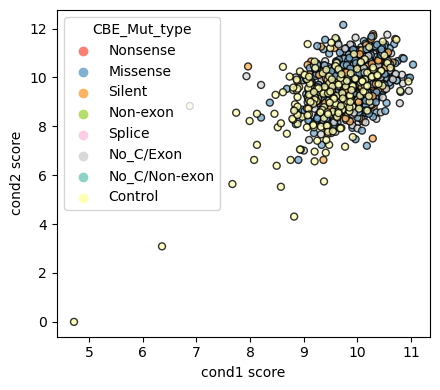

In [20]:
be_scan.plot.plot_scatterplot(df_filepath       = CRAF_parent_dir + 'agg_comps.csv', 
                              x_column          = 'Edit_site', 
                              y_column          = 'log2_fc', 
                              hue_column        = 'CBE_Mut_type', 
                              comparisons       = ['nodox', 'dox', 'dox-nodox'], 
                              neg_ctrl_col      = 'CBE_Mut_type', 
                              neg_ctrl_category = 'Control',

                              )
be_scan.plot.plot_corr_scatterplot(df_filepath  = in_agg, 
                                   condition1   = 'nodox', 
                                   condition2   = 'dox', 
                                   hue_column   = 'CBE_Mut_type',
                                   savefig      = False,
                                   )

### KBTBD4 Data (MY)

In [24]:
# declaring variables to make commands shorter
in_ref = KBTBD4_parent_dir + 'XYH_annotated_KBTBD4_ABE.csv'
KBTBD4_sample_sheet = KBTBD4_parent_dir + '231201_KBTBD4_ABE.csv'
in_lfc = KBTBD4_parent_dir + "agg_t0_reps.csv"
in_agg = KBTBD4_parent_dir + "agg_t0_conds.csv"
in_comparisons = KBTBD4_parent_dir + "comparisons.csv"
keyrev = 'GTTTGAGA'

In [25]:
# option 1
be_scan.analysis.count_reads(
    KBTBD4_sample_sheet,
    in_ref,
    KEY_REV  = 'GTTTGAGA', 
    file_dir = KBTBD4_parent_dir
)
be_scan.analysis.merge_and_norm(
    KBTBD4_sample_sheet,
    in_ref,
    file_dir = KBTBD4_parent_dir
)
be_scan.analysis.average_reps(
    KBTBD4_sample_sheet,
    in_lfc,
    file_dir = KBTBD4_parent_dir
)
be_scan.analysis.compare_conds(
    in_comparisons,
    in_agg,
    file_dir = KBTBD4_parent_dir
)

# option 2
# be_scan.analysis.batch_process(
#     KBTBD4_sample_sheet,
#     in_ref,
#     in_comparisons,
#     file_dir = KBTBD4_parent_dir,
#     KEY_REV  = 'GTTTGAGA', 
# )

../../../../../../Downloads/KBTBD4/Plasmid-lib_S7_L001_R1_001.fastq.gz processed
../../../../../../Downloads/KBTBD4/Unsorted-1-ABE_S11_L001_R1_001.fastq.gz processed
../../../../../../Downloads/KBTBD4/Unsorted-2-ABE_S12_L001_R1_001.fastq.gz processed
../../../../../../Downloads/KBTBD4/Unsorted-3-ABE_S13_L001_R1_001.fastq.gz processed
../../../../../../Downloads/KBTBD4/Sorted-1-ABE_S14_L001_R1_001.fastq.gz processed
../../../../../../Downloads/KBTBD4/Sorted-2-ABE_S15_L001_R1_001.fastq.gz processed
../../../../../../Downloads/KBTBD4/Sorted-3-ABE_S16_L001_R1_001.fastq.gz processed
Merge and normalize completed
Average reps completed
Compare conditions completed


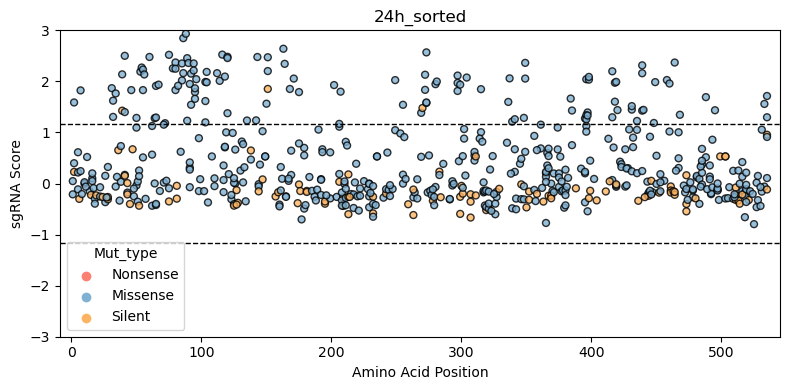

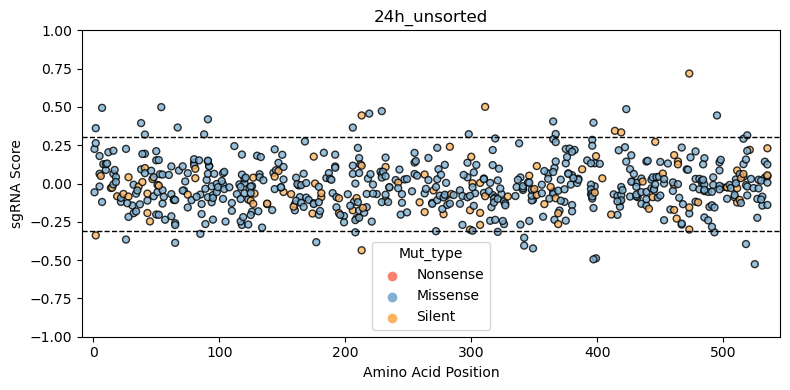

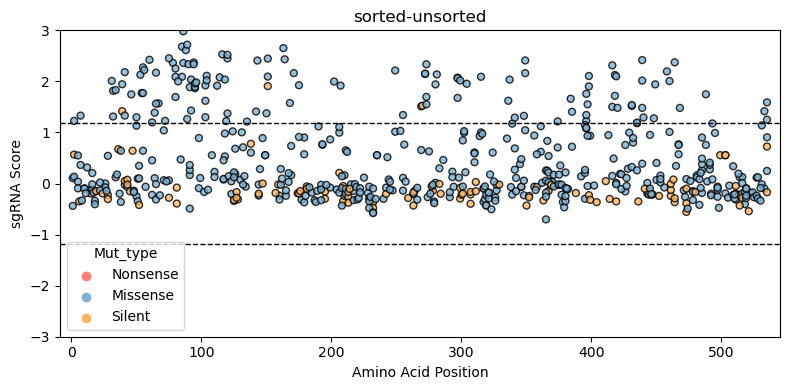

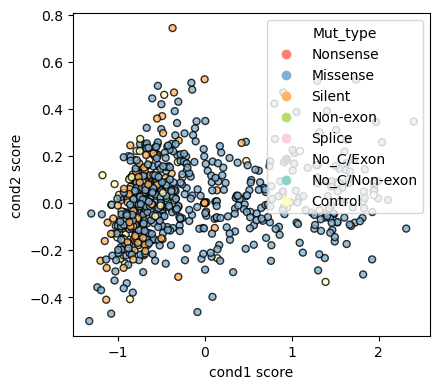

In [26]:
be_scan.plot.plot_scatterplot(df_filepath       = KBTBD4_parent_dir + "agg_comps.csv", 
                              x_column          = 'Edit_site', 
                              y_column          = 'log2_fc', 
                              hue_column        = 'Mut_type', 
                              comparisons       = ['24h_sorted', "24h_unsorted", 'sorted-unsorted'], 
                              neg_ctrl_col      = 'Mut_type', 
                              neg_ctrl_category = 'Control',
                              savefig           = False,
                              )
be_scan.plot.plot_corr_scatterplot(df_filepath  = in_agg, 
                                   condition1   = '24h_sorted', 
                                   condition2   = '24h_unsorted', 
                                   hue_column   = 'Mut_type',
                                   savefig      = False,
                                   )

In [27]:
# declaring variables to make commands shorter
in_ref = KBTBD4_parent_dir + 'XYH_annotated_KBTBD4_CBE.csv'
KBTBD4_sample_sheet = KBTBD4_parent_dir + '231201_KBTBD4_CBE.csv'
in_lfc = KBTBD4_parent_dir + "agg_t0_reps.csv"
in_agg = KBTBD4_parent_dir + "agg_t0_conds.csv"
in_comparisons = KBTBD4_parent_dir + "comparisons.csv"
keyrev = 'GTTTGAGA'

In [28]:
# option 1
be_scan.analysis.count_reads(
    KBTBD4_sample_sheet,
    in_ref,
    KEY_REV  = 'GTTTGAGA', 
    file_dir = KBTBD4_parent_dir
)
be_scan.analysis.merge_and_norm(
    KBTBD4_sample_sheet,
    in_ref,
    file_dir = KBTBD4_parent_dir
)
be_scan.analysis.average_reps(
    KBTBD4_sample_sheet,
    in_lfc,
    file_dir = KBTBD4_parent_dir
)
be_scan.analysis.compare_conds(
    in_comparisons,
    in_agg,
    file_dir = KBTBD4_parent_dir
)

# option 2
be_scan.analysis.batch_process(
    KBTBD4_sample_sheet,
    in_ref,
    in_comparisons,
    file_dir = KBTBD4_parent_dir,
    KEY_REV  = 'GTTTGAGA', 
)

../../../../../../Downloads/KBTBD4/Plasmid-lib-CBE_S17_L001_R1_001.fastq.gz processed
../../../../../../Downloads/KBTBD4/Unsorted-1-CBE_S21_L001_R1_001.fastq.gz processed
../../../../../../Downloads/KBTBD4/Unsorted-2-CBE_S22_L001_R1_001.fastq.gz processed
../../../../../../Downloads/KBTBD4/Unsorted-3-CBE_S23_L001_R1_001.fastq.gz processed
../../../../../../Downloads/KBTBD4/Sorted-1-CBE_S24_L001_R1_001.fastq.gz processed
../../../../../../Downloads/KBTBD4/Sorted-2-CBE_S25_L001_R1_001.fastq.gz processed
../../../../../../Downloads/KBTBD4/Sorted-3-CBE_S26_L001_R1_001.fastq.gz processed
Merge and normalize completed
Average reps completed
Compare conditions completed
../../../../../../Downloads/KBTBD4/Plasmid-lib-CBE_S17_L001_R1_001.fastq.gz processed
../../../../../../Downloads/KBTBD4/Unsorted-1-CBE_S21_L001_R1_001.fastq.gz processed
../../../../../../Downloads/KBTBD4/Unsorted-2-CBE_S22_L001_R1_001.fastq.gz processed
../../../../../../Downloads/KBTBD4/Unsorted-3-CBE_S23_L001_R1_001.fastq.

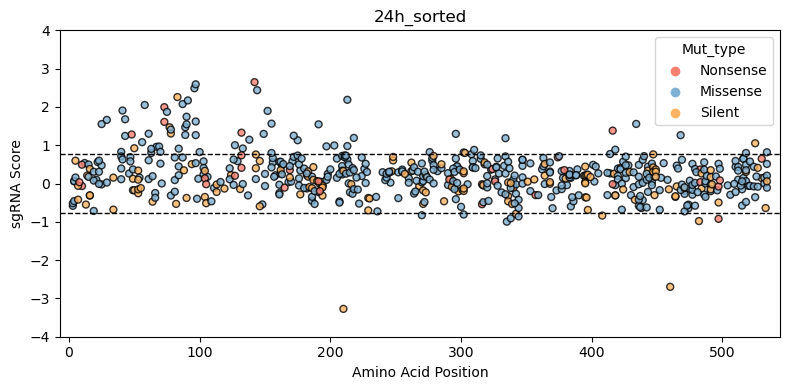

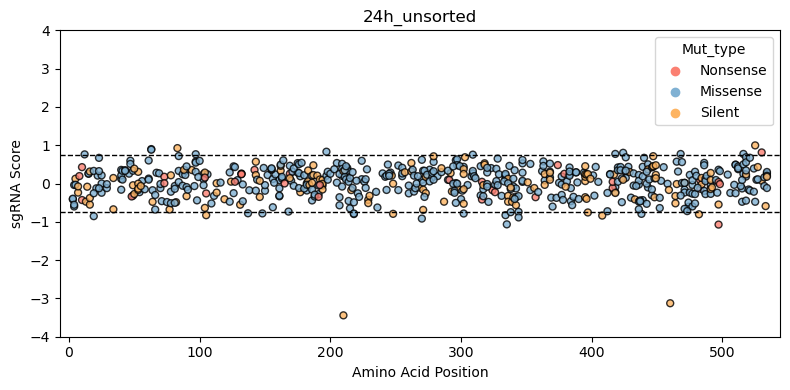

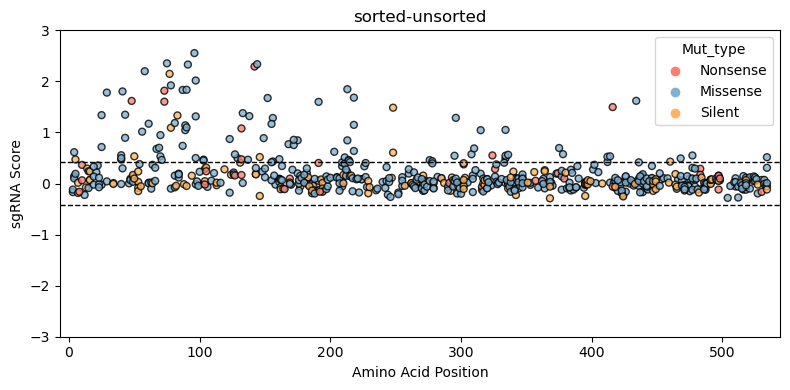

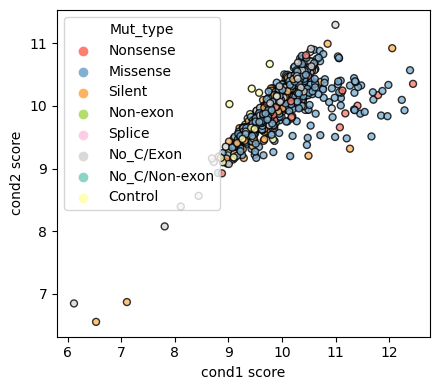

In [29]:
be_scan.plot.plot_scatterplot(df_filepath       = KBTBD4_parent_dir + "agg_comps.csv", 
                              x_column          = 'Edit_site', 
                              y_column          = 'log2_fc', 
                              hue_column        = 'Mut_type', 
                              comparisons       = ['24h_sorted', "24h_unsorted", 'sorted-unsorted'], 
                              neg_ctrl_col      = 'Mut_type', 
                              neg_ctrl_category = 'Control',
                              savefig           = False,
                              )
be_scan.plot.plot_corr_scatterplot(df_filepath  = in_agg, 
                                   condition1   = '24h_sorted', 
                                   condition2   = '24h_unsorted', 
                                   hue_column   = 'Mut_type',
                                   savefig      = False,
                                   )

## Integration Testing CLI

### Integration Testing HDAC Data

In [31]:
# declaring variables to make commands shorter
in_ref = HDAC_parent_dir + "XYH_annotated_HDAC1_ABE.csv"
HDAC_sample_sheet = HDAC_parent_dir + '231128_HDAC1_batch.csv'
in_lfc = HDAC_parent_dir + "agg_t0_reps.csv"
in_agg = HDAC_parent_dir + "agg_t0_conds.csv"
keyrev = 'GTTTGAGA'
in_comparisons = HDAC_parent_dir + "comparisons.csv"
out = HDAC_parent_dir + "agg_comps.csv"

In [6]:
# option 1
! python3 -m be_scan count_reads {HDAC_sample_sheet} {in_ref} --KEY_REV {keyrev} --file_dir {HDAC_parent_dir}
! python3 -m be_scan merge_and_norm {HDAC_sample_sheet} {in_ref} --file_dir {HDAC_parent_dir}
! python3 -m be_scan average_reps {HDAC_sample_sheet} {in_lfc} --file_dir {HDAC_parent_dir}
! python3 -m be_scan compare_conds {in_comparisons} {in_agg} --file_dir {HDAC_parent_dir}
! python3 -m be_scan plot_scatterplot -df {out} -x 'Edit_site' -y 'log2_fc' -hue 'Mut_type' -ncol 'Mut_type' -ncat 'Control' --xmin 0 -c '24h_sorted' '24h_unsorted' 'sorted-unsorted'

/Users/calvinxyh/Documents/GitHub/be_scan/be_scan/analysis/count_reads.py:76: UserWarning: Warning! in_ref is missing column(s) for downstream functions: ['sgRNA_ID', 'Gene', 'cut_site_AA', 'Domain']
  warnings.warn('Warning! in_ref is missing column(s) for downstream functions: ' + str(list_miss))
../../../../../../Downloads/HDAC_Data/MY381-1_S30_L001_R1_001.fastq processed
/Users/calvinxyh/Documents/GitHub/be_scan/be_scan/analysis/count_reads.py:76: UserWarning: Warning! in_ref is missing column(s) for downstream functions: ['sgRNA_ID', 'Gene', 'cut_site_AA', 'Domain']
  warnings.warn('Warning! in_ref is missing column(s) for downstream functions: ' + str(list_miss))
../../../../../../Downloads/HDAC_Data/MY381-5_S34_L001_R1_001.fastq processed
/Users/calvinxyh/Documents/GitHub/be_scan/be_scan/analysis/count_reads.py:76: UserWarning: Warning! in_ref is missing column(s) for downstream functions: ['sgRNA_ID', 'Gene', 'cut_site_AA', 'Domain']
  warnings.warn('Warning! in_ref is missing 

In [32]:
# option 2
! python3 -m be_scan batch_process {HDAC_sample_sheet} {in_ref} {in_comparisons} --KEY_REV {keyrev} --file_dir {HDAC_parent_dir}
! python3 -m be_scan plot_scatterplot -df {out} -x 'Edit_site' -y 'log2_fc' -hue 'Mut_type' -ncol 'Mut_type' -ncat 'Control' --xmin 0 -c '24h_sorted' '24h_unsorted' 'sorted-unsorted'

/Users/calvinxyh/Documents/GitHub/be_scan/be_scan/analysis/count_reads.py:76: UserWarning: Warning! in_ref is missing column(s) for downstream functions: ['sgRNA_ID', 'Gene', 'cut_site_AA', 'Domain']
  warnings.warn('Warning! in_ref is missing column(s) for downstream functions: ' + str(list_miss))
../../../../../../Downloads/HDAC_Data/MY381-1_S30_L001_R1_001.fastq processed
/Users/calvinxyh/Documents/GitHub/be_scan/be_scan/analysis/count_reads.py:76: UserWarning: Warning! in_ref is missing column(s) for downstream functions: ['sgRNA_ID', 'Gene', 'cut_site_AA', 'Domain']
  warnings.warn('Warning! in_ref is missing column(s) for downstream functions: ' + str(list_miss))
../../../../../../Downloads/HDAC_Data/MY381-5_S34_L001_R1_001.fastq processed
/Users/calvinxyh/Documents/GitHub/be_scan/be_scan/analysis/count_reads.py:76: UserWarning: Warning! in_ref is missing column(s) for downstream functions: ['sgRNA_ID', 'Gene', 'cut_site_AA', 'Domain']
  warnings.warn('Warning! in_ref is missing 

### Integration Testing CRAF Data

In [39]:
# declaring variables to make commands shorter
in_ref = CRAF_parent_dir + 'CRAF_and_cntrls_ref_lib.csv'
CRAF_sample_sheet = CRAF_parent_dir + 'sample_sheet_batch_count_CBE.csv'
in_lfc = CRAF_parent_dir + "agg_t0_reps.csv"
in_agg = CRAF_parent_dir + "agg_t0_conds.csv"
keyrev = 'GTTTGAGA'
in_comparisons = CRAF_parent_dir + "comparisons.csv"
out = CRAF_parent_dir + "agg_comps.csv"

In [40]:
# option 1
! python3 -m be_scan count_reads {CRAF_sample_sheet} {in_ref} --KEY_REV {keyrev} --file_dir {CRAF_parent_dir}
! python3 -m be_scan merge_and_norm {CRAF_sample_sheet} {in_ref} --file_dir {CRAF_parent_dir}
! python3 -m be_scan average_reps {CRAF_sample_sheet} {in_lfc} --file_dir {CRAF_parent_dir}
! python3 -m be_scan compare_conds {in_comparisons} {in_agg} --file_dir {CRAF_parent_dir}
! python3 -m be_scan plot_scatterplot -df {out} -x 'Edit_site' -y 'log2_fc' -hue 'CBE_Mut_type' -ncol 'CBE_Mut_type' -ncat 'Control' --xmin 1 -c 'nodox' 'dox' 'dox-nodox'


/Users/calvinxyh/Documents/GitHub/be_scan/be_scan/analysis/count_reads.py:76: UserWarning: Warning! in_ref is missing column(s) for downstream functions: ['cut_site_AA']
  warnings.warn('Warning! in_ref is missing column(s) for downstream functions: ' + str(list_miss))
../../../../../../Downloads/CRAF_Data/JW114-01_S1_L001_R1_001.fastq processed
/Users/calvinxyh/Documents/GitHub/be_scan/be_scan/analysis/count_reads.py:76: UserWarning: Warning! in_ref is missing column(s) for downstream functions: ['cut_site_AA']
  warnings.warn('Warning! in_ref is missing column(s) for downstream functions: ' + str(list_miss))
../../../../../../Downloads/CRAF_Data/JW114-02_S2_L001_R1_001.fastq processed
/Users/calvinxyh/Documents/GitHub/be_scan/be_scan/analysis/count_reads.py:76: UserWarning: Warning! in_ref is missing column(s) for downstream functions: ['cut_site_AA']
  warnings.warn('Warning! in_ref is missing column(s) for downstream functions: ' + str(list_miss))
../../../../../../Downloads/CRAF_D

In [42]:
# option 2
! python3 -m be_scan batch_process {CRAF_sample_sheet} {in_ref} {in_comparisons} --KEY_REV {keyrev} --file_dir {CRAF_parent_dir}
! python3 -m be_scan plot_scatterplot -df {out} -x 'Edit_site' -y 'log2_fc' -hue 'CBE_Mut_type' -ncol 'CBE_Mut_type' -ncat 'Control' --xmin 1 -c 'nodox' 'dox' 'dox-nodox'

/Users/calvinxyh/Documents/GitHub/be_scan/be_scan/analysis/count_reads.py:76: UserWarning: Warning! in_ref is missing column(s) for downstream functions: ['cut_site_AA']
  warnings.warn('Warning! in_ref is missing column(s) for downstream functions: ' + str(list_miss))
../../../../../../Downloads/CRAF_Data/JW114-01_S1_L001_R1_001.fastq processed
/Users/calvinxyh/Documents/GitHub/be_scan/be_scan/analysis/count_reads.py:76: UserWarning: Warning! in_ref is missing column(s) for downstream functions: ['cut_site_AA']
  warnings.warn('Warning! in_ref is missing column(s) for downstream functions: ' + str(list_miss))
../../../../../../Downloads/CRAF_Data/JW114-02_S2_L001_R1_001.fastq processed
/Users/calvinxyh/Documents/GitHub/be_scan/be_scan/analysis/count_reads.py:76: UserWarning: Warning! in_ref is missing column(s) for downstream functions: ['cut_site_AA']
  warnings.warn('Warning! in_ref is missing column(s) for downstream functions: ' + str(list_miss))
../../../../../../Downloads/CRAF_D

### Integration Testing KBTBD4

In [43]:
# declaring variables to make commands shorter
in_ref = KBTBD4_parent_dir + 'XYH_annotated_KBTBD4_ABE.csv'
KBTBD4_sample_sheet = KBTBD4_parent_dir + '231201_KBTBD4_ABE.csv'
in_lfc = KBTBD4_parent_dir + "agg_t0_reps.csv"
in_agg = KBTBD4_parent_dir + "agg_t0_conds.csv"
keyrev = 'GTTTGAGA'
in_comparisons = KBTBD4_parent_dir + "comparisons.csv"
out = KBTBD4_parent_dir + "agg_comps.csv"

In [44]:
# option 1
! python3 -m be_scan count_reads {KBTBD4_sample_sheet} {in_ref} --KEY_REV {keyrev} --file_dir {KBTBD4_parent_dir}
! python3 -m be_scan merge_and_norm {KBTBD4_sample_sheet} {in_ref} --file_dir {KBTBD4_parent_dir}
! python3 -m be_scan average_reps {KBTBD4_sample_sheet} {in_lfc} --file_dir {KBTBD4_parent_dir}
! python3 -m be_scan compare_conds {in_comparisons} {in_agg} --file_dir {KBTBD4_parent_dir}
! python3 -m be_scan plot_scatterplot -df {out} -x 'Edit_site' -y 'log2_fc' -hue 'Mut_type' -ncol 'Mut_type' -ncat 'Control' --xmin 0 -c '24h_sorted' '24h_unsorted' 'sorted-unsorted'

/Users/calvinxyh/Documents/GitHub/be_scan/be_scan/analysis/count_reads.py:76: UserWarning: Warning! in_ref is missing column(s) for downstream functions: ['sgRNA_ID', 'Gene', 'cut_site_AA', 'Domain']
  warnings.warn('Warning! in_ref is missing column(s) for downstream functions: ' + str(list_miss))
../../../../../../Downloads/KBTBD4/Plasmid-lib_S7_L001_R1_001.fastq.gz processed
/Users/calvinxyh/Documents/GitHub/be_scan/be_scan/analysis/count_reads.py:76: UserWarning: Warning! in_ref is missing column(s) for downstream functions: ['sgRNA_ID', 'Gene', 'cut_site_AA', 'Domain']
  warnings.warn('Warning! in_ref is missing column(s) for downstream functions: ' + str(list_miss))
../../../../../../Downloads/KBTBD4/Unsorted-1-ABE_S11_L001_R1_001.fastq.gz processed
/Users/calvinxyh/Documents/GitHub/be_scan/be_scan/analysis/count_reads.py:76: UserWarning: Warning! in_ref is missing column(s) for downstream functions: ['sgRNA_ID', 'Gene', 'cut_site_AA', 'Domain']
  warnings.warn('Warning! in_ref i

In [45]:
# option 2
! python3 -m be_scan batch_process {KBTBD4_sample_sheet} {in_ref} {in_comparisons} --KEY_REV {keyrev} --file_dir {KBTBD4_parent_dir}
! python3 -m be_scan plot_scatterplot -df {out} -x 'Edit_site' -y 'log2_fc' -hue 'Mut_type' -ncol 'Mut_type' -ncat 'Control' --xmin 0 -c '24h_sorted' '24h_unsorted' 'sorted-unsorted'

/Users/calvinxyh/Documents/GitHub/be_scan/be_scan/analysis/count_reads.py:76: UserWarning: Warning! in_ref is missing column(s) for downstream functions: ['sgRNA_ID', 'Gene', 'cut_site_AA', 'Domain']
  warnings.warn('Warning! in_ref is missing column(s) for downstream functions: ' + str(list_miss))
../../../../../../Downloads/KBTBD4/Plasmid-lib_S7_L001_R1_001.fastq.gz processed
/Users/calvinxyh/Documents/GitHub/be_scan/be_scan/analysis/count_reads.py:76: UserWarning: Warning! in_ref is missing column(s) for downstream functions: ['sgRNA_ID', 'Gene', 'cut_site_AA', 'Domain']
  warnings.warn('Warning! in_ref is missing column(s) for downstream functions: ' + str(list_miss))
../../../../../../Downloads/KBTBD4/Unsorted-1-ABE_S11_L001_R1_001.fastq.gz processed
/Users/calvinxyh/Documents/GitHub/be_scan/be_scan/analysis/count_reads.py:76: UserWarning: Warning! in_ref is missing column(s) for downstream functions: ['sgRNA_ID', 'Gene', 'cut_site_AA', 'Domain']
  warnings.warn('Warning! in_ref i

In [46]:
# declaring variables to make commands shorter
in_ref = KBTBD4_parent_dir + 'XYH_annotated_KBTBD4_CBE.csv'
KBTBD4_sample_sheet = KBTBD4_parent_dir + '231201_KBTBD4_CBE.csv'
in_lfc = KBTBD4_parent_dir + "agg_t0_reps.csv"
in_agg = KBTBD4_parent_dir + "agg_t0_conds.csv"
keyrev = 'GTTTGAGA'
in_comparisons = KBTBD4_parent_dir + "comparisons.csv"
out = KBTBD4_parent_dir + "agg_comps.csv"

In [47]:
# option 1
! python3 -m be_scan count_reads {KBTBD4_sample_sheet} {in_ref} --KEY_REV {keyrev} --file_dir {KBTBD4_parent_dir}
! python3 -m be_scan merge_and_norm {KBTBD4_sample_sheet} {in_ref} --file_dir {KBTBD4_parent_dir}
! python3 -m be_scan average_reps {KBTBD4_sample_sheet} {in_lfc} --file_dir {KBTBD4_parent_dir}
! python3 -m be_scan compare_conds {in_comparisons} {in_agg} --file_dir {KBTBD4_parent_dir}
! python3 -m be_scan plot_scatterplot -df {out} -x 'Edit_site' -y 'log2_fc' -hue 'Mut_type' -ncol 'Mut_type' -ncat 'Control' --xmin 0 -c '24h_sorted' '24h_unsorted' 'sorted-unsorted'

/Users/calvinxyh/Documents/GitHub/be_scan/be_scan/analysis/count_reads.py:76: UserWarning: Warning! in_ref is missing column(s) for downstream functions: ['sgRNA_ID', 'Gene', 'cut_site_AA', 'Domain']
  warnings.warn('Warning! in_ref is missing column(s) for downstream functions: ' + str(list_miss))
../../../../../../Downloads/KBTBD4/Plasmid-lib-CBE_S17_L001_R1_001.fastq.gz processed
/Users/calvinxyh/Documents/GitHub/be_scan/be_scan/analysis/count_reads.py:76: UserWarning: Warning! in_ref is missing column(s) for downstream functions: ['sgRNA_ID', 'Gene', 'cut_site_AA', 'Domain']
  warnings.warn('Warning! in_ref is missing column(s) for downstream functions: ' + str(list_miss))
../../../../../../Downloads/KBTBD4/Unsorted-1-CBE_S21_L001_R1_001.fastq.gz processed
/Users/calvinxyh/Documents/GitHub/be_scan/be_scan/analysis/count_reads.py:76: UserWarning: Warning! in_ref is missing column(s) for downstream functions: ['sgRNA_ID', 'Gene', 'cut_site_AA', 'Domain']
  warnings.warn('Warning! in_

In [48]:
# option 2
! python3 -m be_scan batch_process {KBTBD4_sample_sheet} {in_ref} {in_comparisons} --KEY_REV {keyrev} --file_dir {KBTBD4_parent_dir}
! python3 -m be_scan plot_scatterplot -df {out} -x 'Edit_site' -y 'log2_fc' -hue 'Mut_type' -ncol 'Mut_type' -ncat 'Control' --xmin 0 -c '24h_sorted' '24h_unsorted' 'sorted-unsorted'

/Users/calvinxyh/Documents/GitHub/be_scan/be_scan/analysis/count_reads.py:76: UserWarning: Warning! in_ref is missing column(s) for downstream functions: ['sgRNA_ID', 'Gene', 'cut_site_AA', 'Domain']
  warnings.warn('Warning! in_ref is missing column(s) for downstream functions: ' + str(list_miss))
../../../../../../Downloads/KBTBD4/Plasmid-lib-CBE_S17_L001_R1_001.fastq.gz processed
/Users/calvinxyh/Documents/GitHub/be_scan/be_scan/analysis/count_reads.py:76: UserWarning: Warning! in_ref is missing column(s) for downstream functions: ['sgRNA_ID', 'Gene', 'cut_site_AA', 'Domain']
  warnings.warn('Warning! in_ref is missing column(s) for downstream functions: ' + str(list_miss))
../../../../../../Downloads/KBTBD4/Unsorted-1-CBE_S21_L001_R1_001.fastq.gz processed
/Users/calvinxyh/Documents/GitHub/be_scan/be_scan/analysis/count_reads.py:76: UserWarning: Warning! in_ref is missing column(s) for downstream functions: ['sgRNA_ID', 'Gene', 'cut_site_AA', 'Domain']
  warnings.warn('Warning! in_